# Tarea 10 - Machine Learning

In [54]:
#Funciones y librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

def kmeans_cluster(X, y, k_val):
    for k in k_val:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        
        y_pred = kmeans.labels_
        
        print(f'Resultados para k = {k}')
        
        cm = confusion_matrix(y, y_pred)
        acc = accuracy_score(y, y_pred)
        
        print(f'Precision: {acc}')
        
        plt.figure(figsize = (6,5))
        sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues', xticklabels= iris.target_names, yticklabels = iris.target_names)
        plt.title(f'Matriz de confusion para k = {k}')
        plt.xlabel('Pred')
        plt.ylabel('Real')
        plt.show()

        pca = PCA(n_components = 2)
        X_pca = pca.fit_transform(X)

        plt.figure(figsize = (6,4))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred, cmap = 'viridis', marker='o')
        plt.title(f'Agrupamiento con KMeans (k={k})')
        plt.xlabel('Componente 1')
        plt.ylabel('Componente 2')
        plt.colorbar()
        plt.show()

## Ejercicio 1

Utilizando como base el conjunto de datos importado, elabora un programa que realice el algoritmo k-means. Selecciona varios valores de k como parámetro inicial y comprueba los resultados obtenidos con los valores conocidos de las muestras previamente clasificadas

La librería *sklearn* nos da la opción de obtener datasets con el fin de evaluar los modelos y métricas, de ahí mismo obtendremos el dataset de iris. El cual es información sobre la flor iris y la categorización de dicha flor, midiéndose en sus características. Realizaré un análisis previo de la información

In [37]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Resultados para k = 2
Precision: 0.6466666666666666


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


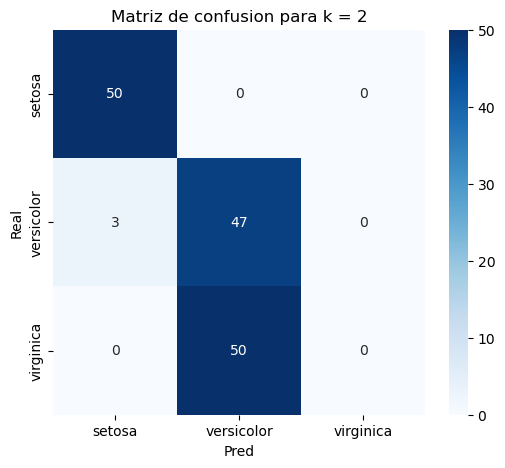

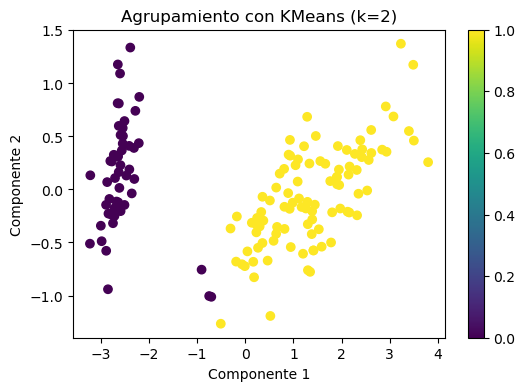

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Resultados para k = 3
Precision: 0.8933333333333333


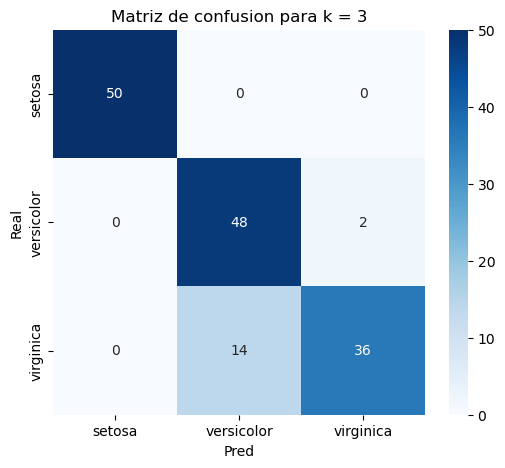

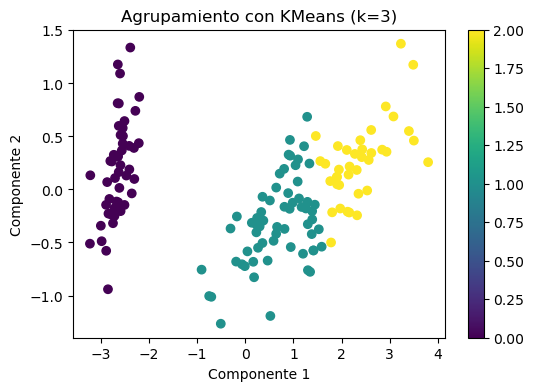

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Resultados para k = 4
Precision: 0.006666666666666667


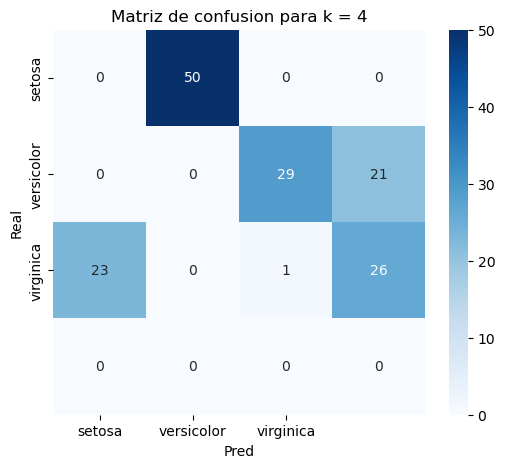

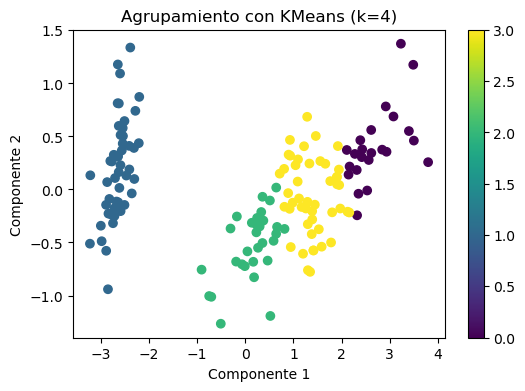

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Resultados para k = 5
Precision: 0.16


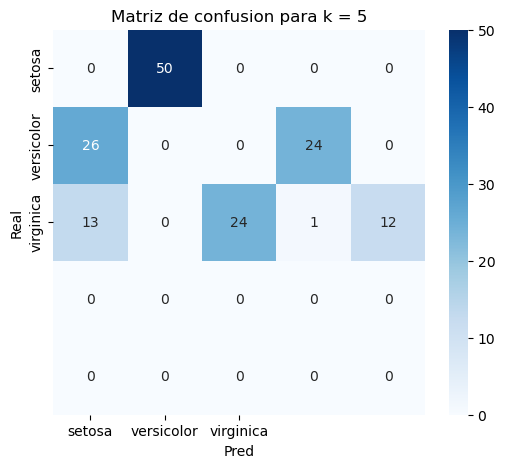

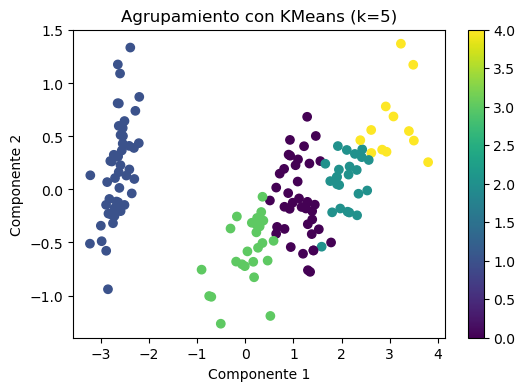

In [47]:
k_vals = [2,3,4,5]
kmeans_cluster(X, y, k_vals)

**Conclusiones**

- Como se puede observar, el rendimiento del algoritmo es mejor con *k=3*, esto se debe a que el set inicial tiene 3 tipos de flor para clasificar. El algoritmo tras haber entrenado con esas 3 categorías, predice mejor para esas 3 categorias.
- Si bien, el rendimiento para otras categorías es bueno, al menos para *k=2* es bueno, con una precisión alta, lo recomendable es utilizar 3 categorías para este problema.
- La reducción de dimensionalidad es crucial para este tipo de problemas, puesto que ayuda a visualizar cómo actuan los componentes y checar si la agrupación es la adecuada.

## Ejercicio 2

Repite el ejercicio anterior, pero utilizando el agrupamiento jerárquico aglomerativo, genera el dendograma correspondiente utilizando el método de *linkage* completo y realiza el análisis de los índices *silhouette* para seleccionar el número óptimo de clústeres

Antes de realizar el desarrollo del agrupamiento jerárquico aglomerativo, recordemos que el HAC (Hierarchical Agglomerative Clustering) es una técnica de agrupamiento que construye una jerarquía de clústers fusionando iterativamente los clusters más cercanos. El proceso termina cuando todos los puntos pertenecen a un solo cluster.

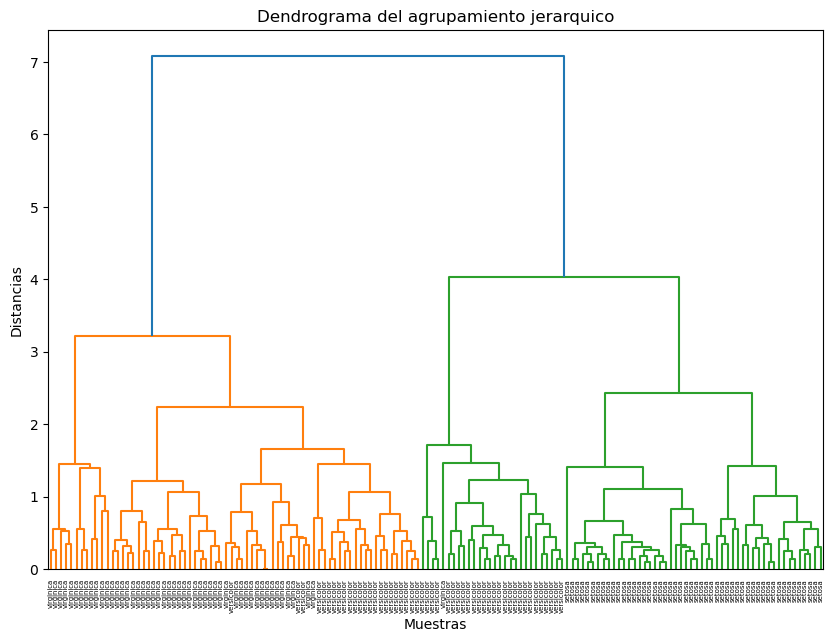

In [73]:
#La carga de datos ya se realizó, solo falta realizar la agrupación
Z = linkage(X, method='complete')

#Dendograma
plt.figure(figsize=(10,7))
dendrogram(Z, labels=iris.target_names[y], leaf_rotation=90)
plt.title('Dendrograma del agrupamiento jerarquico')
plt.xlabel('Muestras')
plt.ylabel('Distancias')
plt.show()

Antes de dar conclusiones sobre el número de clústeres calculados a partir del drendograma, explicaré un poco sobre la interpretación de los mismos.

El dendrograma es un diagrama de árbol que muestra los grupos que se forman al crear conglomerados de observaciones en cada paso y sus niveles de similitud. El nivel de similitud se mide en el eje vertical (alternativamente se puede mostrar el nivel de distancia) y las diferentes observaciones se especifican en el eje horizontal.

Se provee un método que se define en la función *linkage* dicha agrupación es considerada para el cálculo de la distancia entre los clústeres durante la fusión, hay distintos de métodos, tales como:
- Enlace único
- Completo
- Promedio
- Ward
- Centroidal

La siguiente gráfica resume las ventajas, desventajas y uso de los métodos:

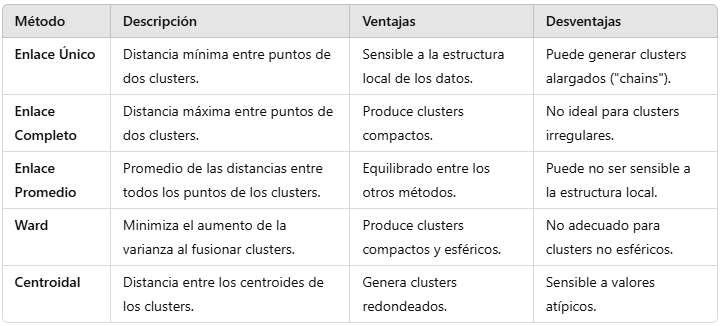

Debido a la naturaleza de los datos, utilizando el método completo.

Con esto en cuenta, si nosotros colocamos nuestra linea imaginaria por encima de la distancia 4, obtendremos 2 clusteres como resultado del cálculo de distancias entre todos los posibles clústeres. Por otro lado, si se coloca la linea imaginaria por encima de la distancia de 3, se obtienen 3 clústeres.

In [77]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [83]:
df = pd.DataFrame(X, columns = iris.feature_names)

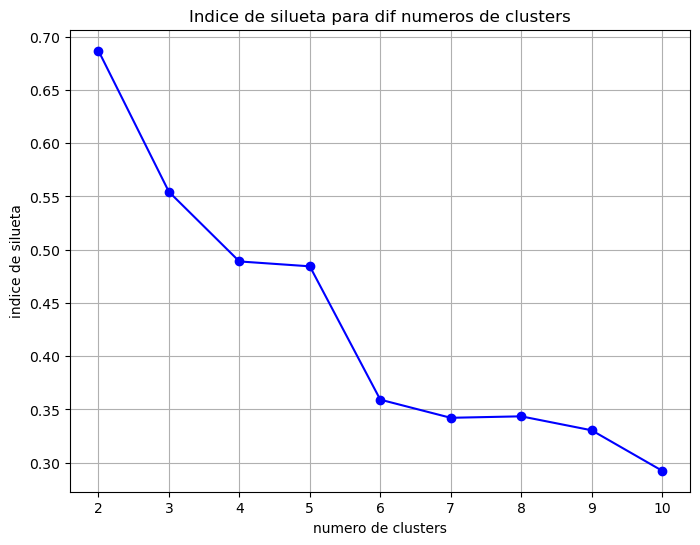

Optimo: 2


In [93]:
silhoutte_scores = []

for n_clusters in range(2,11):
    model = AgglomerativeClustering(n_clusters = n_clusters)
    clusters = model.fit_predict(df)
    score = silhouette_score(df, clusters)
    silhoutte_scores.append(score)

plt.figure(figsize=(8,6))
plt.plot(range(2,11), silhoutte_scores, marker='o', color='b')
plt.title('Indice de silueta para dif numeros de clusters')
plt.xlabel('numero de clusters')
plt.ylabel('indice de silueta')
plt.xticks(range(2,11))
plt.grid(True)
plt.show()

optimal_cluster = range(2,11)[silhoutte_scores.index(max(silhoutte_scores))]
print(f'Optimo: {optimal_cluster}')

El resultado del análisis también apoya obtener 2 clústers.

**Conclusiones**

El resultado de haber realizado el agrupamiento por jerarquía aglomerativa apoya que sean 2 clústeres, sin embargo, puede que esta no sea la opción adecuada, dado que la información del dataset de iris se compone de 3 grupos de flores, esto se puede deber al tipo de método de enlace, al utilizar el completo, se generan clusters alargados y esto puede dar indicios a la razón de obtener 2 clústers en vez de 3. 

Por otro lado, el resultado de utilizar k means, da un resultado de precisión alto ante un número de clusters de 3

## Ejercicio 3

Con el número de clústeres obtenido en el punto 3, implementa el agrupamiento c-means difuso con el mismo conjunto de datos base. Modifica algunos parámetros de inicialización (criterio de terminación/grado de difusividad) y repite el experimento anterior al menos en 2 nuevas ocasiones.

Recordemos que en el agrupamiento tradicional, después de que se ubican o actualizan los centroides de cada grupo, todas las muestras se juntan en su clúster más cercano. El algoritmo de k-means difuso sugiere un uso de la agrupación probabilística en lugar de utilizar la agrupación absoluta. El proceso que conforma este algoritmo sigue los siguientes pasos:

- Configuración de los parámetros iniciales: En este paso se define un número fijo de clústeres k (siendo el número de muestras) y se establece el criterio de terminación (0<c<1). También se incorpora la selección del grado de difusividad del grupo
- Inicialización: Se inicializa aleatoriamente el algoritmo k-mean, se obtienen los centroides de cada grupo y se calcula la probabilidad que tiene cada muestra de pertenecer a dicho grupos
- Iteración: Se recalculan los centroides de los grupos ponderando las probabilidades de pertenencia de las muestras
- Terminación: El paso anterior se repite hasta la convergencia o hasta que se haya alcanzado un número de iteraciones especificado por el usuario

In [108]:
data = iris.data
df = pd.DataFrame(data, columns = iris.feature_names)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [110]:
#Configuración de parámetros iniciales
n_clusters = 3 #Num de clusters
m = 2 #Parámetro de difusividad
error = 1e-4 #Critero de terminación
maxiter = 100 #Iteraciones para terminación

In [112]:
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data_scaled.T, n_clusters, m, error=error, maxiter=maxiter) #Devuelve los centros de clusters

In [114]:
cluster_membership = np.argmax(u, axis = 0)

In [118]:
#Recordemos que se cuentan con 150 muestras
print(f'Puntos asignados a cada cluster: \n{pd.Series(cluster_membership).value_counts()}')

Puntos asignados a cada cluster: 
2    52
0    50
1    48
Name: count, dtype: int64


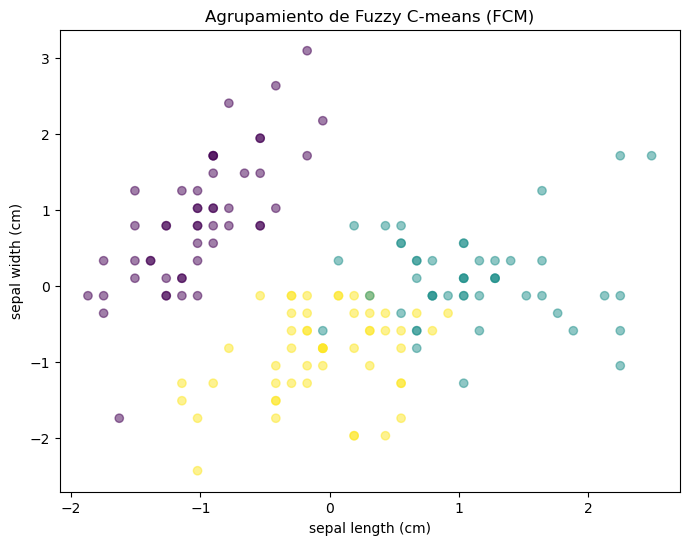

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
plt.title("Agrupamiento de Fuzzy C-means (FCM)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_54624\198884071.py:3: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(cntr[i, 0], cntr[i, 1], label=f'Centro del Cluster {i+1}', s=200, marker='x', edgecolor='black')


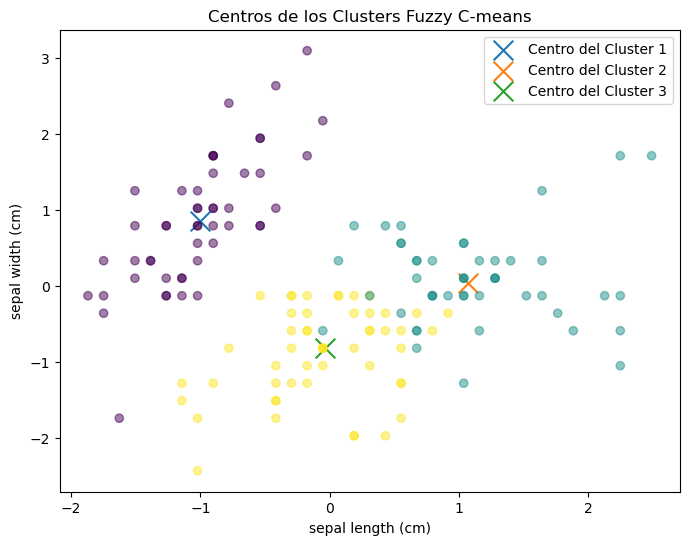

In [122]:
plt.figure(figsize=(8, 6))
for i in range(n_clusters):
    plt.scatter(cntr[i, 0], cntr[i, 1], label=f'Centro del Cluster {i+1}', s=200, marker='x', edgecolor='black')

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=cluster_membership, cmap='viridis', alpha=0.5)
plt.title("Centros de los Clusters Fuzzy C-means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()